In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm

In [2]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)
expts = ['panant-v2','panant-hycom1','panant-v3','panant-hycom1-v2']

In [3]:
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


<Client: 'tcp://127.0.0.1:38527' processes=6 threads=24, memory=96.00 GiB>

In [4]:
depth = cc.querying.getvar('panant-v2','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

## Looking for DSW layer depth

In [5]:
%%time
hmo_h1 = cc.querying.getvar('panant-hycom1-v2','hmo', session,chunks={'xh':120}).sel(xh=slice(-230, -140)).isel(time=slice(24,36)).mean('time').load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, 

CPU times: user 1min 57s, sys: 15.1 s, total: 2min 12s
Wall time: 11min 8s


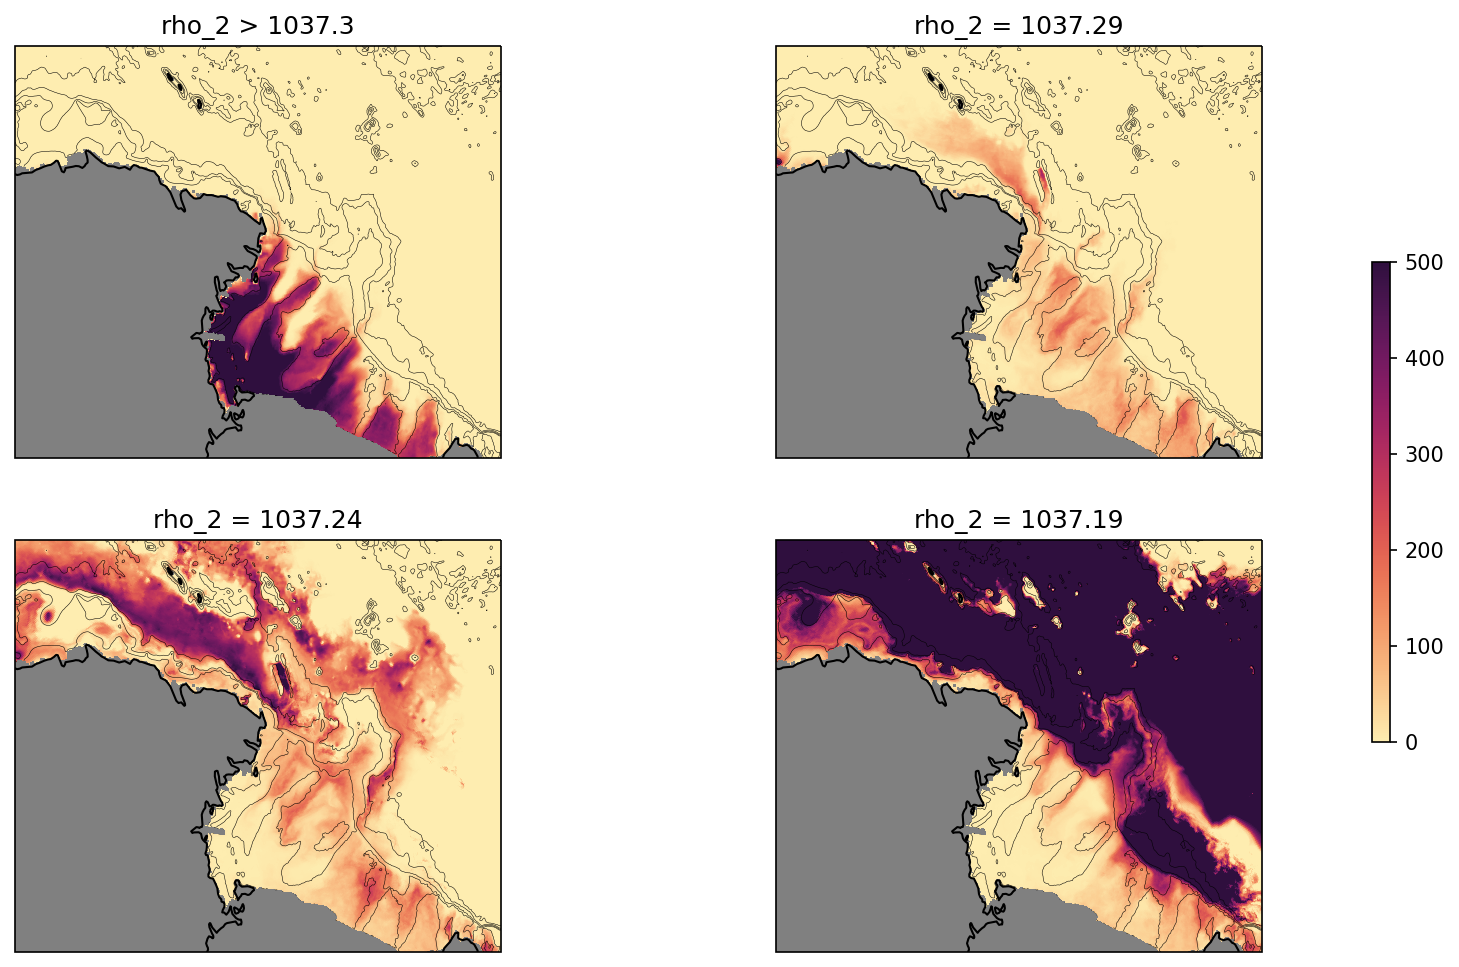

In [6]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = hmo_h1.sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = hmo_h1.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = hmo_h1.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = hmo_h1.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

#ax.set_boundary(circle, transform=ax.transAxes)
#plt.savefig('figures/Ross.png')

In [7]:
%%time
hmo_v3 = cc.querying.getvar('panant-v3','hmo', session,chunks={'xh':120}).sel(xh=slice(-230, -140)).isel(time=slice(24,36)).mean('time').load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, 

CPU times: user 1min 10s, sys: 7.23 s, total: 1min 17s
Wall time: 6min 2s


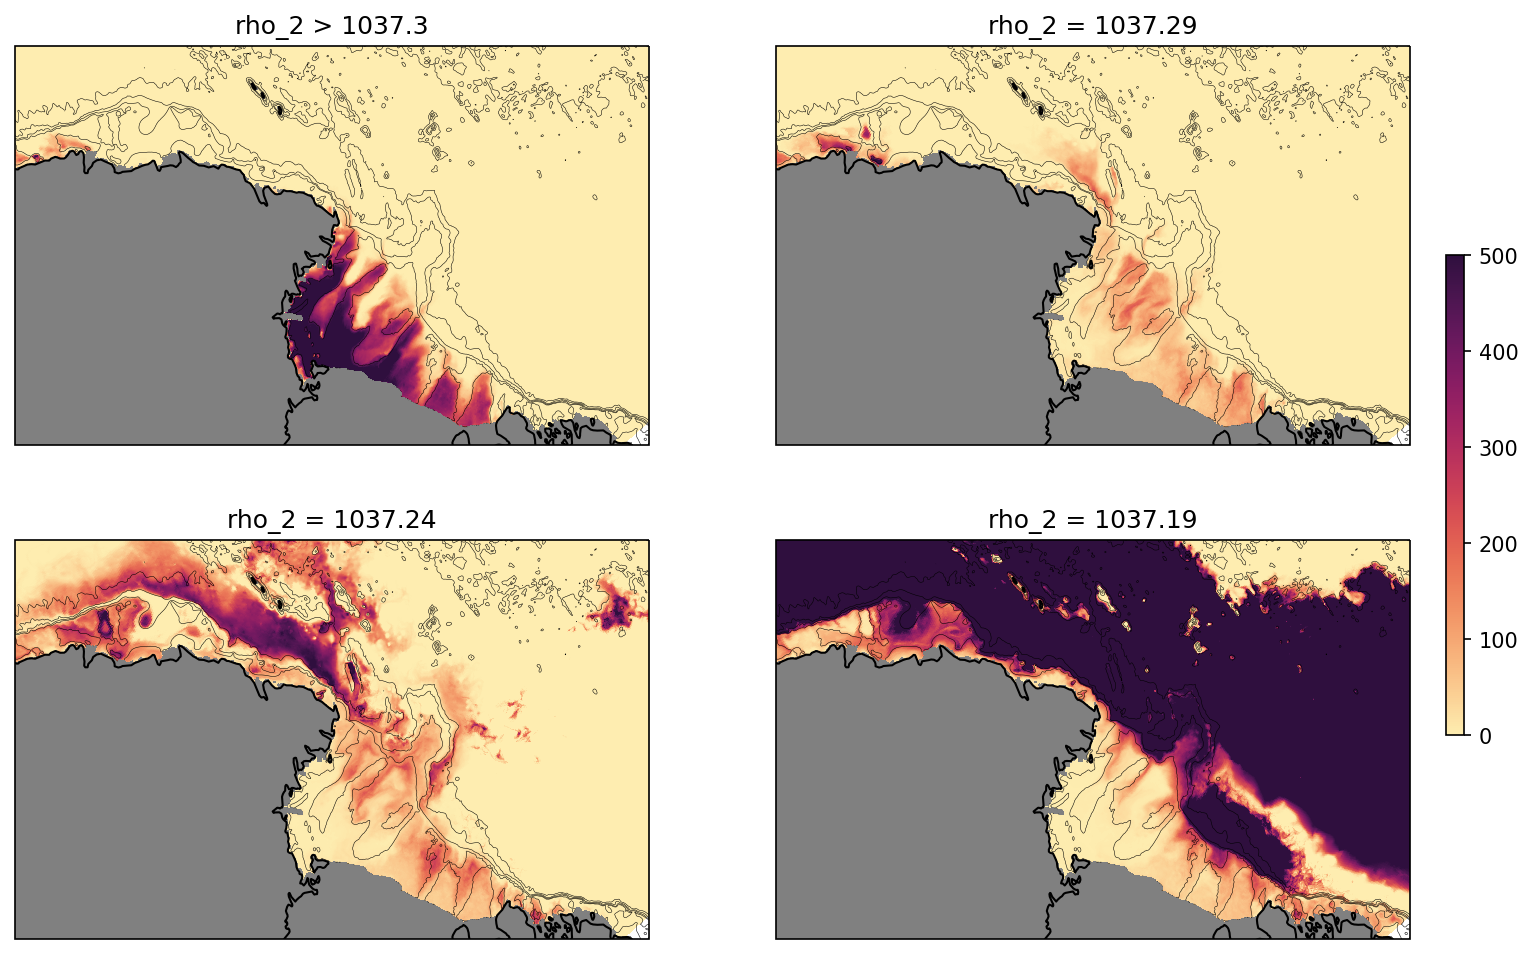

In [8]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = hmo_v3.sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = hmo_v3.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_v3.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = hmo_v3.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_v3.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = hmo_v3.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_v3.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

In [9]:
hmo_diff = hmo_h1 - hmo_v3

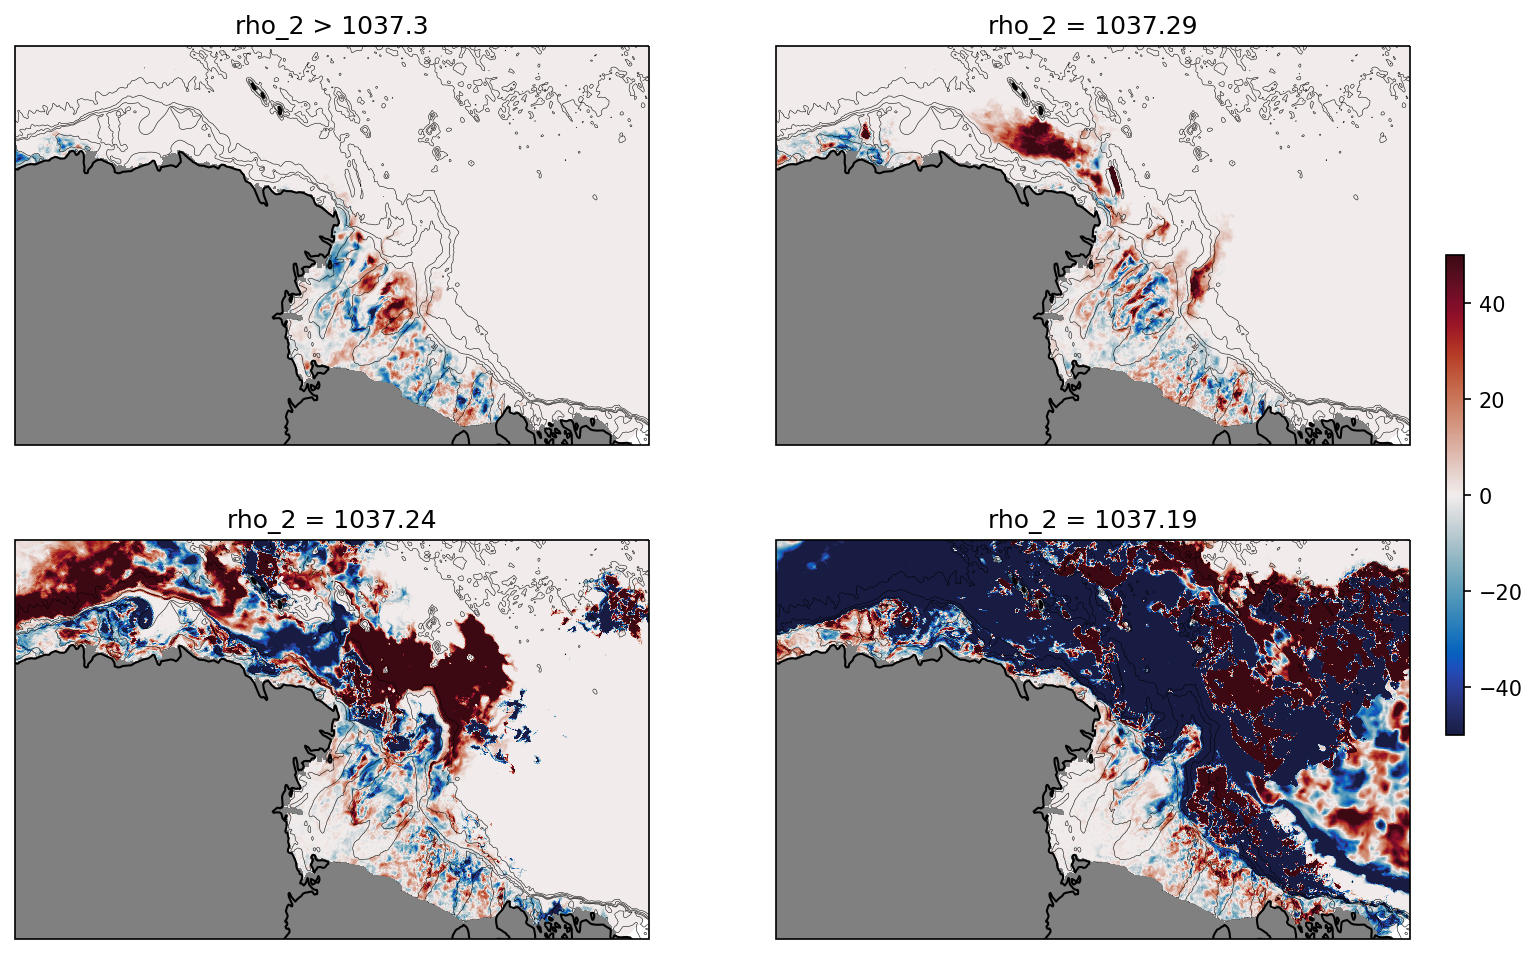

In [10]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = hmo_diff.sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = hmo_diff.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_diff.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = hmo_diff.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_diff.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = hmo_diff.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_diff.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

## Look at transport magnitude

In [11]:
%%time
vmo_v3 = cc.querying.getvar('panant-v3','vmo', session,chunks={'xh':240}).sel(xh=slice(-230, -140)).isel(time=slice(24,36)).mean('time').load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, 

CPU times: user 1min 45s, sys: 15.7 s, total: 2min 1s
Wall time: 9min 12s


In [15]:
%%time
vmo_h1 = cc.querying.getvar('panant-hycom1-v2','vmo', session,chunks={'xh':240}).sel(xh=slice(-230, -140)).isel(time=slice(24,36)).mean('time').load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 49.3 s, sys: 5.71 s, total: 55.1 s
Wall time: 4min 22s


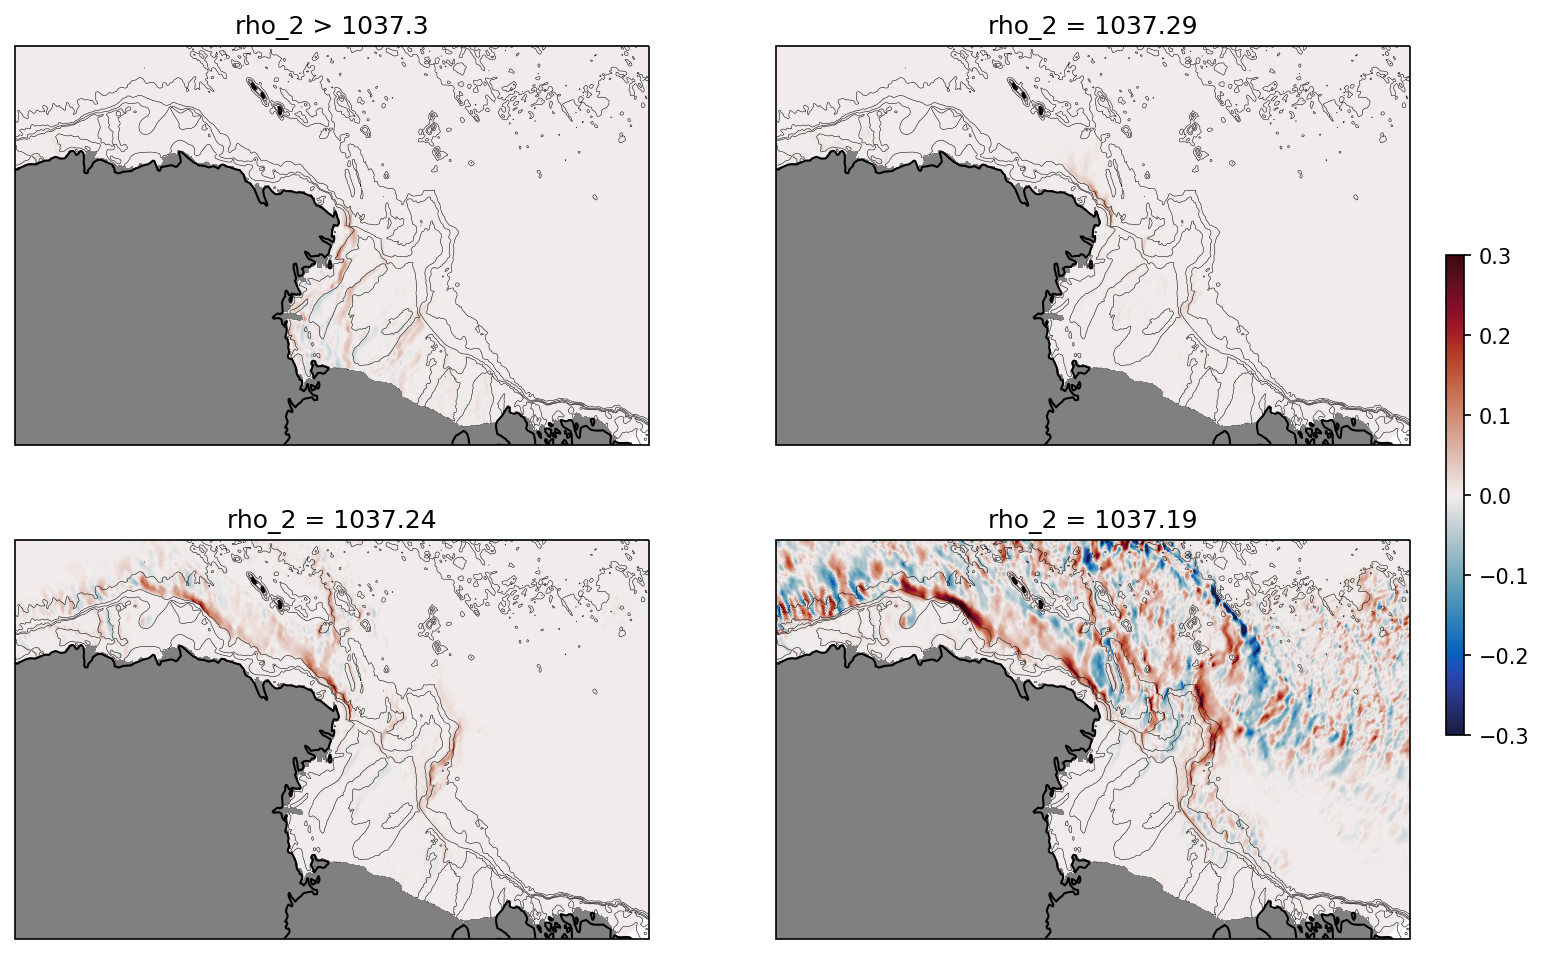

In [16]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = (vmo_v3/1e9).sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.3,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = (vmo_v3/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.3,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_v3.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = (vmo_v3/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.3,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_v3.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = (vmo_v3/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.3,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_v3.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

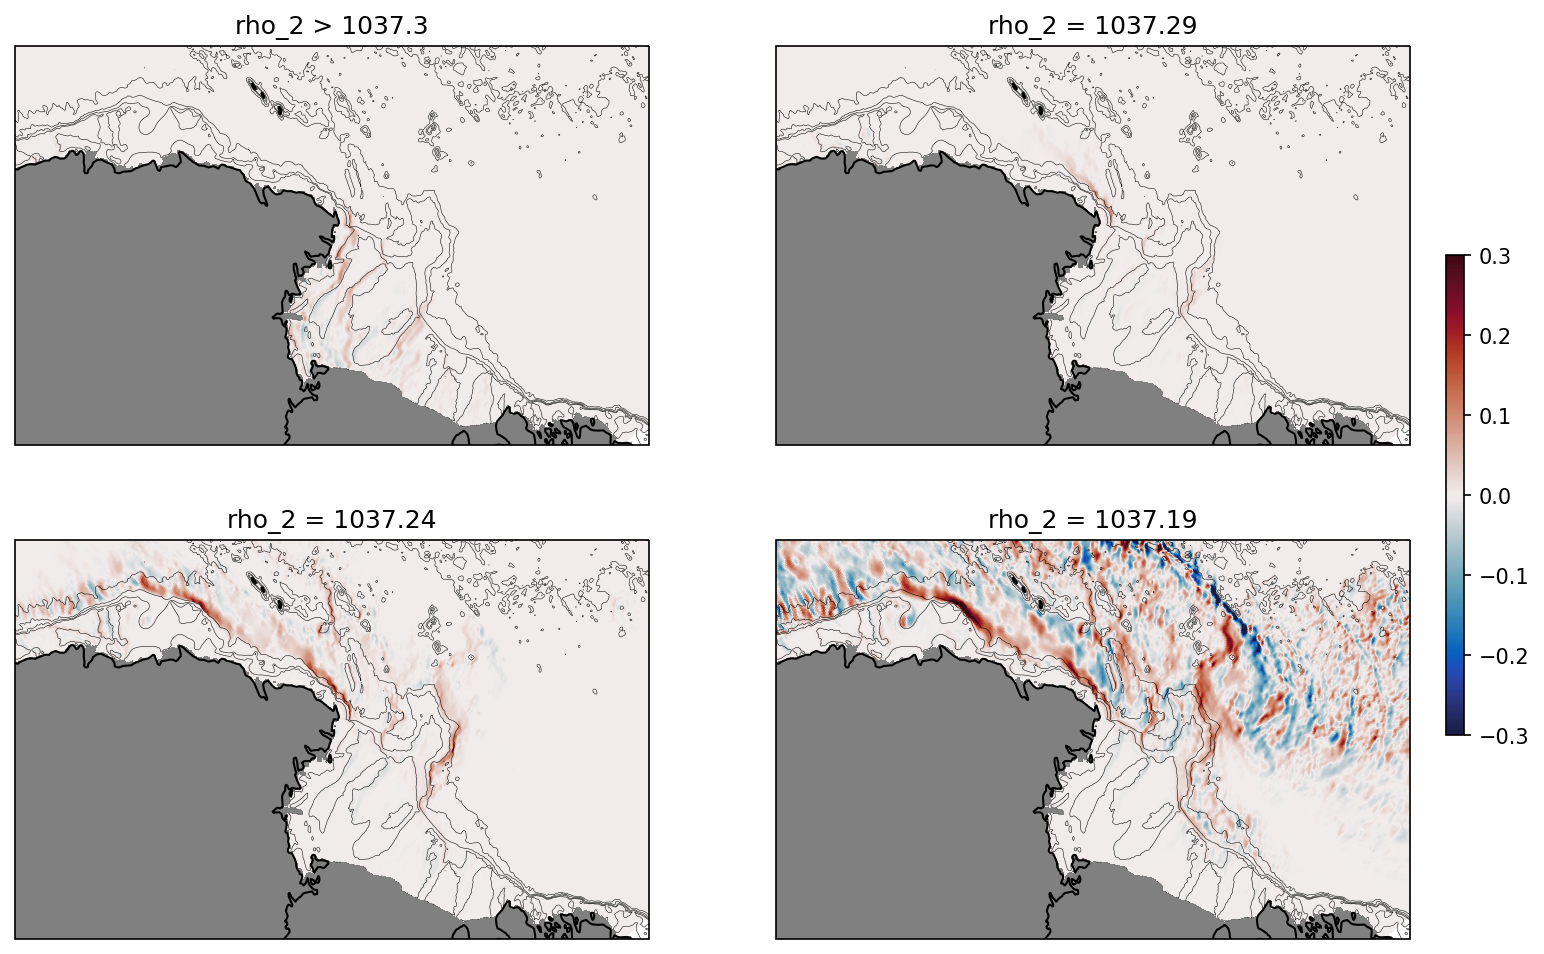

In [17]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = (vmo_h1/1e9).sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.3,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = (vmo_h1/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.3,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = (vmo_h1/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.3,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = (vmo_h1/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.3,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

In [18]:
vmo_diff = vmo_h1 - vmo_v3

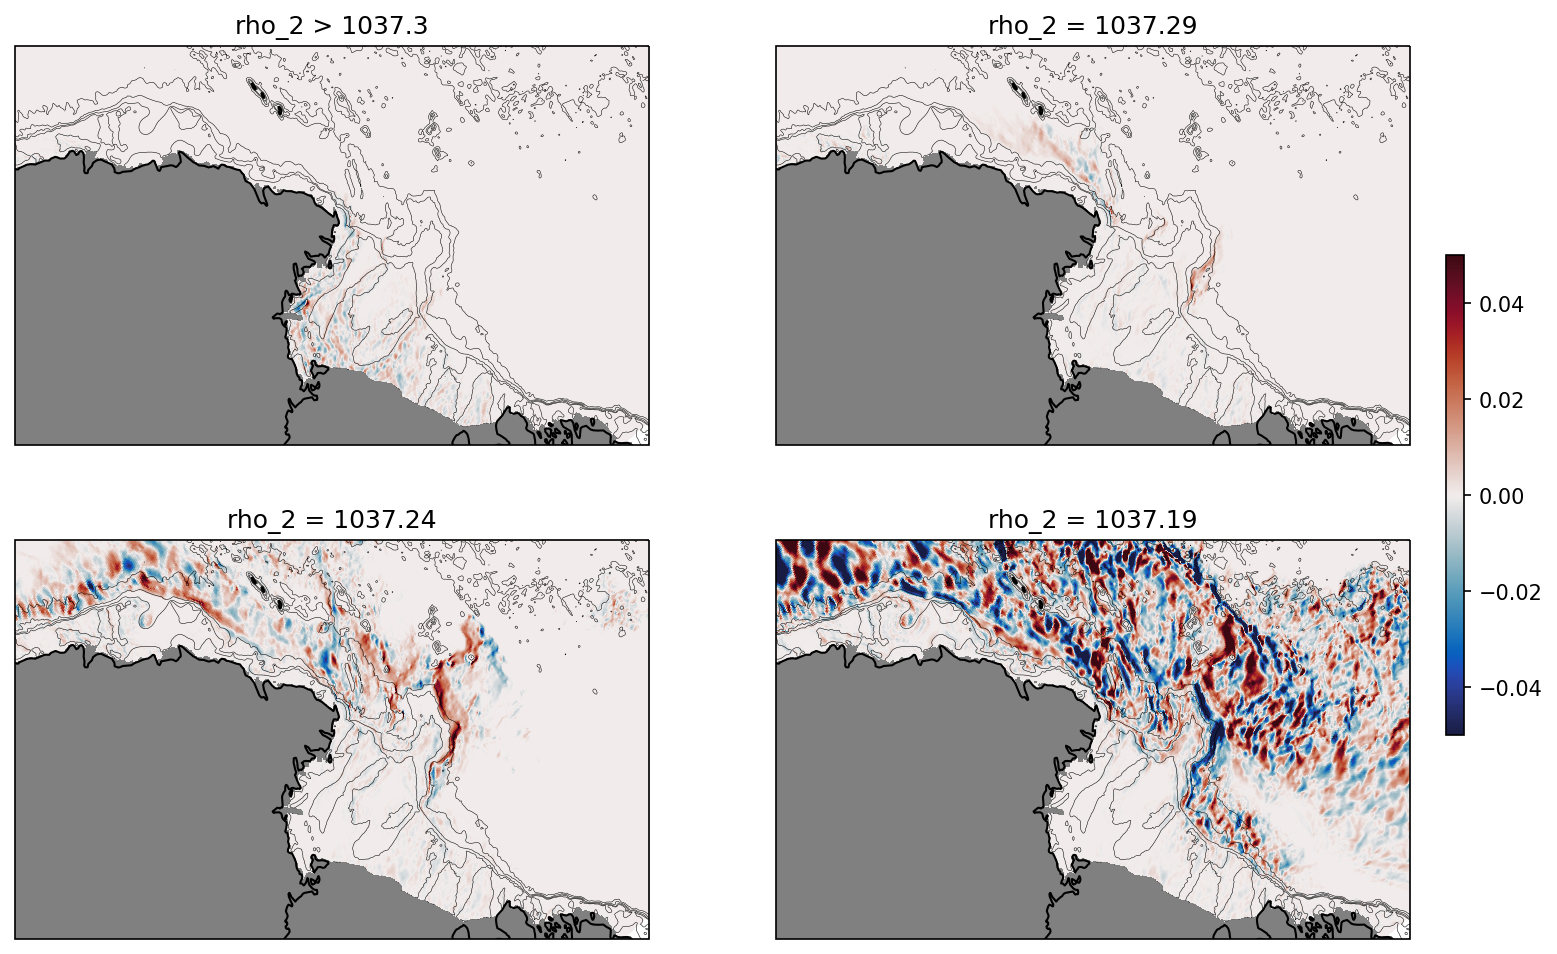

In [19]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = (vmo_diff/1e9).sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = (vmo_diff/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%vmo_diff.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = (vmo_diff/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%vmo_diff.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = (vmo_diff/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%vmo_diff.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

## Plotting surface speed, making movies, etc.

In [4]:
speed = cc.querying.getvar('panant-hycom1-v2','speed', session)

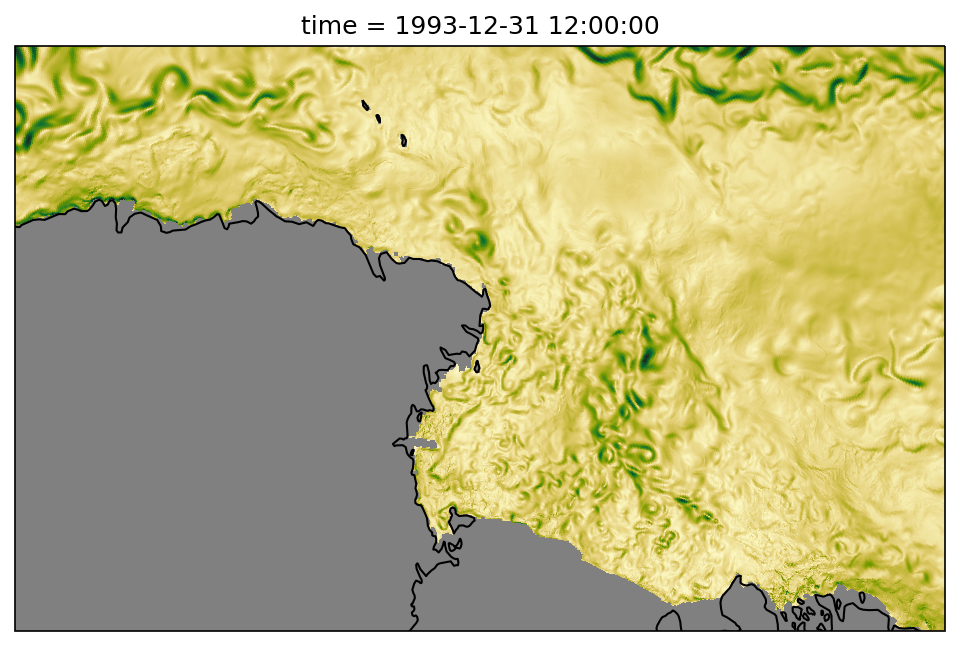

In [12]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(8, 6), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
speed.isel(time=-1).plot(ax=ax,add_colorbar=False,vmin=0,vmax=0.6,
                     transform=ccrs.PlateCarree(),cmap=cm.cm.speed)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')

ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
#ax.set_boundary(circle, transform=ax.transAxes)
plt.savefig('figures/Ross.png')


In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=150)
for ii in range(speed.time.size):
    
    speed_frame = speed.isel(time=ii)
    
    ax = plt.subplot(1, 1, 1, projection=projection)
    speed_frame.plot(add_colorbar=False,vmin=0,vmax=0.6,
                     transform=ccrs.PlateCarree(),cmap=cm.cm.speed)
    ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
    ax.coastlines(resolution='50m')
    ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())


    plt.title('')
    plt.tight_layout()
    
    filestr = '/g/data/x77/amh157/ross-frames/image%04d.png' % ii
    plt.savefig(filestr,dpi=150)
    plt.clf()
    if np.mod(ii,10)==0:
        print(ii)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
